# Object Detection with SSD (Single Shot Detector)
### TensorFlow's SSD (Single Shot Multibox Detector) model                                                                              

## INTRODUCTION

In this code, I have used TensorFlow's SSD (Single Shot Multibox Detector) model, which is a fast and efficient object detection model, to detect objects within images. The SSD model has been pre-trained on a large dataset, specifically Open Images V4, and is available via TensorFlow Hub. By loading the SSD model, it can detect objects in any given image, draw bounding boxes around the detected objects, and display the results. This approach makes it suitable for various applications such as image classification, object tracking, and even real-time video analysis

In [4]:
#!pip install tensorflow-hub


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
C:\Users\USER\AppData\Local\Temp\ipykernel_13072\304751458.py:97: DeprecationWarning: getsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use getbbox or getlength instead.
  text_width, text_height = font.getsize(display_str)


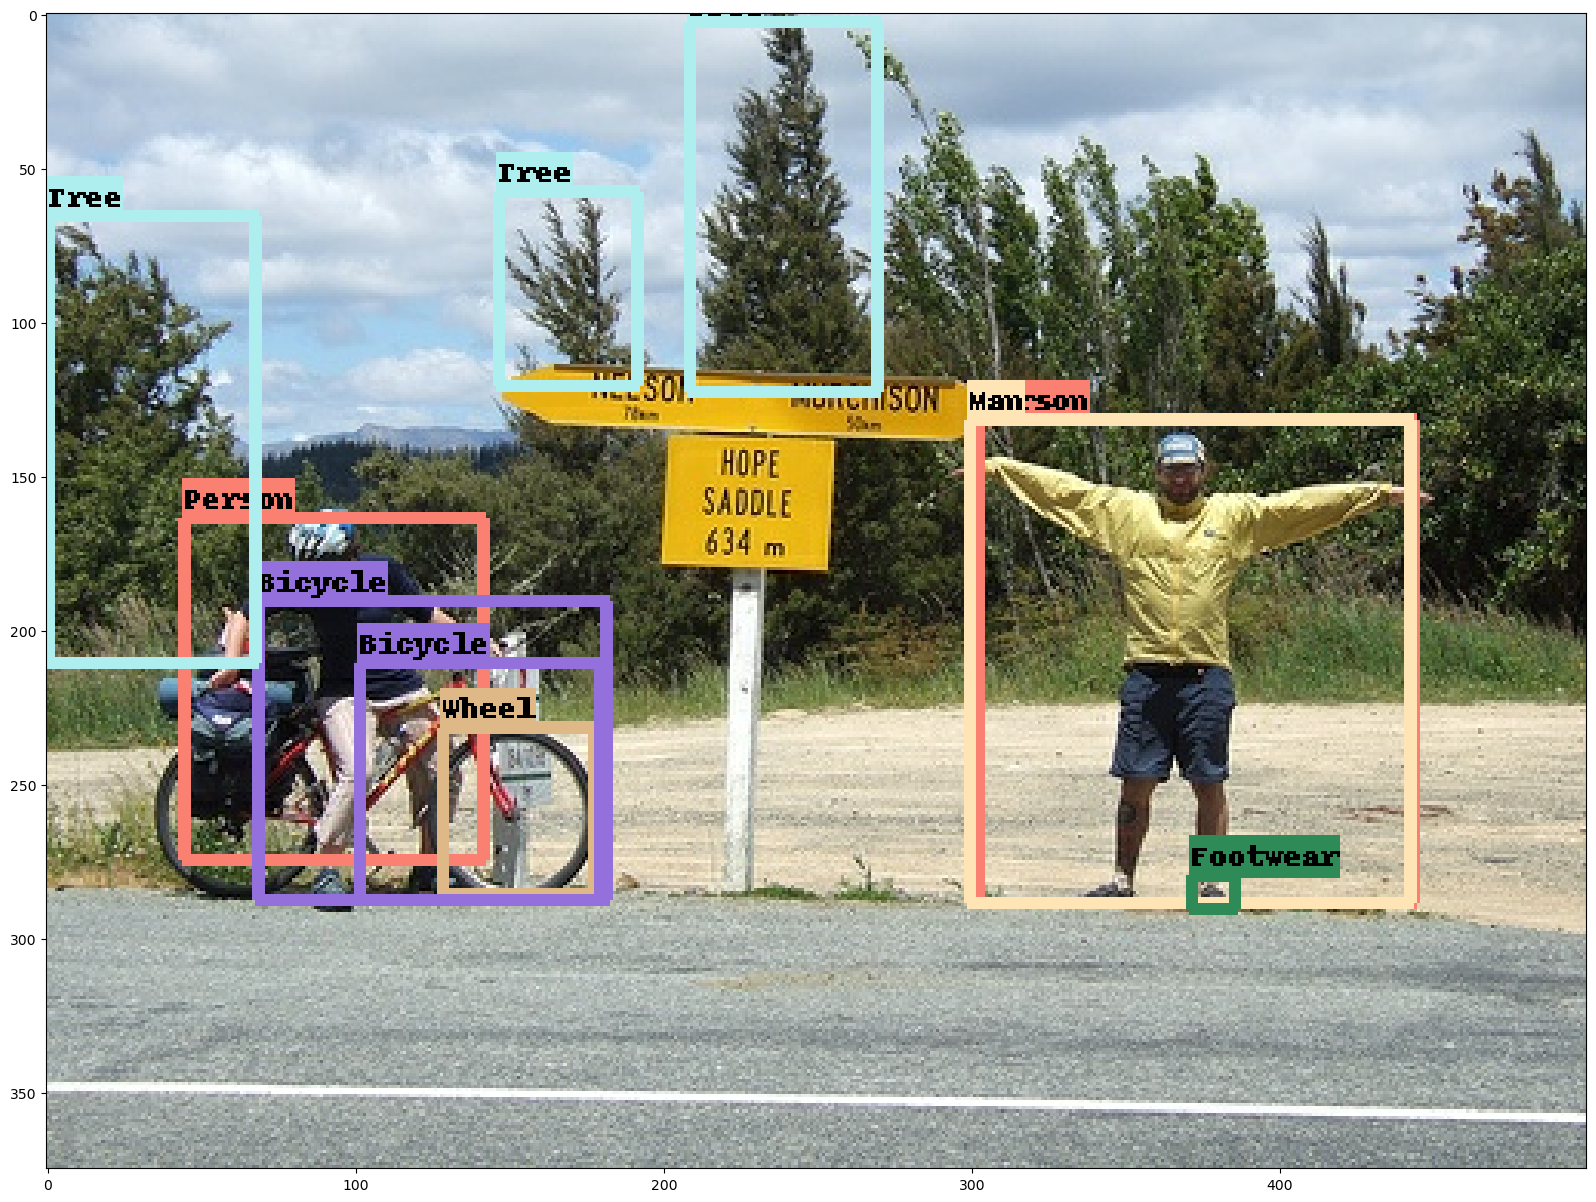

In [26]:
from PIL import Image, ImageDraw, ImageColor, ImageOps, ImageFont
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

# Load the SSD model from TensorFlow Hubr
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"
detector = hub.load(module_handle).signatures['default']

# Function to resize an image from a local path
def load_and_resize_image(path, new_width=369, new_height=215, display=False):
    pil_image = Image.open(path)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert("RGB")
    if display:
        display_image(pil_image_rgb)
    return np.array(pil_image_rgb)

# Function to display the image
def display_image(image):
    plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)
    plt.show()

# Function to draw bounding boxes on the image
def draw_bounding_box_on_image(image, ymin, xmin, ymax, xmax, color, font, thickness=4, display_str_list=()):
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=thickness, fill=color)

    for display_str in display_str_list:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, top - text_height - 2 * margin), (left + text_width, top)], fill=color)
        draw.text((left + margin, top - text_height - margin), display_str, fill="black", font=font)

def draw_boxes(image, boxes, class_names, max_boxes=10, min_score=0.1):
    colors = list(ImageColor.colormap.values())
    font = ImageFont.load_default()
    for i in range(min(boxes.shape[0], max_boxes)):
        ymin, xmin, ymax, xmax = tuple(boxes[i])
        display_str = class_names[i].decode("ascii")
        color = colors[hash(class_names[i]) % len(colors)]
        image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
        draw_bounding_box_on_image(image_pil, ymin, xmin, ymax, xmax, color, font, display_str_list=[display_str])
        np.copyto(image, np.array(image_pil))
    return image

# SSD function to perform detection on the resized image
def ssd(detector, path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    result = detector(converted_img)
    result = {key: value.numpy() for key, value in result.items()}
    result_image = draw_boxes(img.numpy(), result["detection_boxes"], result["detection_class_entities"])
    display_image(result_image)

# Specify the path to the image in Pascal VOC 2007
image_path = r'from PIL import Image, ImageDraw, ImageColor, ImageOps, ImageFont'
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

# Load the SSD model from TensorFlow Hubr
module_handle = "https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1"
detector = hub.load(module_handle).signatures['default']

# Function to resize an image from a local path
def load_and_resize_image(path, new_width=369, new_height=215, display=False):
    pil_image = Image.open(path)
    pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
    pil_image_rgb = pil_image.convert("RGB")
    if display:
        display_image(pil_image_rgb)
    return np.array(pil_image_rgb)

# Function to display the image
def display_image(image):
    plt.figure(figsize=(20, 15))
    plt.grid(False)
    plt.imshow(image)
    plt.show()

# Function to draw bounding boxes on the image
def draw_bounding_box_on_image(image, ymin, xmin, ymax, xmax, color, font, thickness=4, display_str_list=()):
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width, ymin * im_height, ymax * im_height)
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=thickness, fill=color)

    for display_str in display_str_list:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, top - text_height - 2 * margin), (left + text_width, top)], fill=color)
        draw.text((left + margin, top - text_height - margin), display_str, fill="black", font=font)

def draw_boxes(image, boxes, class_names, max_boxes=10, min_score=0.1):
    colors = list(ImageColor.colormap.values())
    font = ImageFont.load_default()
    for i in range(min(boxes.shape[0], max_boxes)):
        ymin, xmin, ymax, xmax = tuple(boxes[i])
        display_str = class_names[i].decode("ascii")
        color = colors[hash(class_names[i]) % len(colors)]
        image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
        draw_bounding_box_on_image(image_pil, ymin, xmin, ymax, xmax, color, font, display_str_list=[display_str])
        np.copyto(image, np.array(image_pil))
    return image

# SSD function to perform detection on the resized image
def ssd(detector, path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    converted_img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    result = detector(converted_img)
    result = {key: value.numpy() for key, value in result.items()}
    result_image = draw_boxes(img.numpy(), result["detection_boxes"], result["detection_class_entities"])
    display_image(result_image)

# Specify the path to the image in Pascal VOC 2007
image_path = r'C:\Users\USER\Downloads\VOCtrainval_06-Nov-2007\VOCdevkit\VOC2007\JPEGImages\000030.jpg'
ssd(detector, image_path)